In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

In [2]:
import sys
sys.path.insert(2,'..')


In [3]:
import functions
import selection
import DataPull

In [6]:
df_alphabet = DataPull.pull_alphabet_all()

In [7]:
selection_alphabet= selection.filter_options(df_alphabet)
selection_alphabet['implied_volatility'] = selection_alphabet.progress_apply(functions.implied_volatility,axis =1 )
average_iv_alphabet = functions.average_daily_implied_volatility(selection_alphabet)
functions.plot(average_iv_google)

  0%|                                                                            | 1/273549 [00:00<26:16:25,  2.89it/s]X:\github\ThesisProject\Jupyterlab\..\functions.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  while (abs(p - c) / v) > tol and max_iter > 0:
  1%|█                                                                          | 3898/273549 [00:14<21:07, 212.71it/s]X:\github\ThesisProject\Jupyterlab\..\functions.py:46: RuntimeWarning: overflow encountered in scalar divide
  while (abs(p - c) / v) > tol and max_iter > 0:
100%|█████████████████████████████████████████████████████████████████████████| 273549/273549 [16:04<00:00, 283.58it/s]


NameError: name 'average_iv_google' is not defined

In [4]:
df_google = DataPull.pull_alphabet_all()
df_apple = DataPull.pull_apple_2018()
df_microsoft = DataPull.pull_microsoft_2018()
df_sp500 = DataPull.pull_microsoft_2018()
df_nasdaq100 = DataPull.pull_microsoft_2018()

In [5]:
tqdm.pandas()

In [6]:
selection_google = selection.filter_options(df_google)
selection_apple = selection.filter_options(df_apple)
selection_microsoft = selection.filter_options(df_microsoft)


In [7]:
selection_google['implied_volatility'] = selection_google.progress_apply(functions.implied_volatility,axis =1 )
selection_apple['implied_volatility'] = selection_apple.progress_apply(functions.implied_volatility,axis =1 )
selection_microsoft['implied_volatility'] = selection_microsoft.progress_apply(functions.implied_volatility,axis =1 )


  0%|                                                                                | 6/51578 [00:00<14:23, 59.70it/s]X:\github\ThesisProject\Jupyterlab\..\functions.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  while (abs(p - c) / v) > tol and max_iter > 0:
  6%|████▎                                                                       | 2928/51578 [00:12<04:25, 183.47it/s]X:\github\ThesisProject\Jupyterlab\..\functions.py:46: RuntimeWarning: overflow encountered in scalar divide
  while (abs(p - c) / v) > tol and max_iter > 0:
  0%|                                                                                        | 0/10714 [00:00<?, ?it/s]X:\github\ThesisProject\Jupyterlab\..\functions.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  while (abs(p - c) / v) > tol and max_iter > 0:
 10%|███████▊                                                                    | 1097/10714 [00:04<00:59, 161.04it/s]X:\github\ThesisProject\Jupyterlab\..\

In [8]:
average_iv_google = functions.average_daily_implied_volatility(selection_google)
average_iv_apple = functions.average_daily_implied_volatility(selection_apple)
average_iv_microsoft = functions.average_daily_implied_volatility(selection_microsoft)


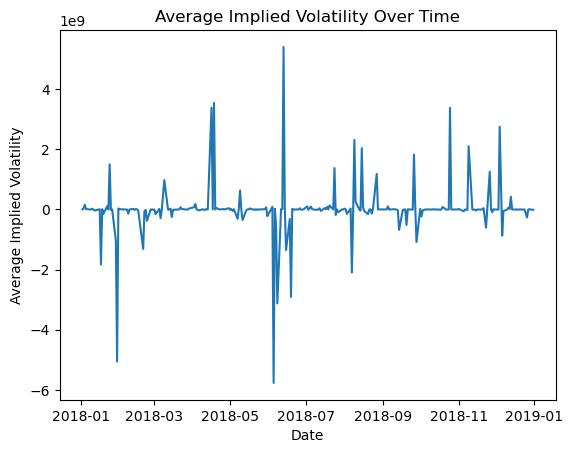

In [9]:
functions.plot(average_iv_google)

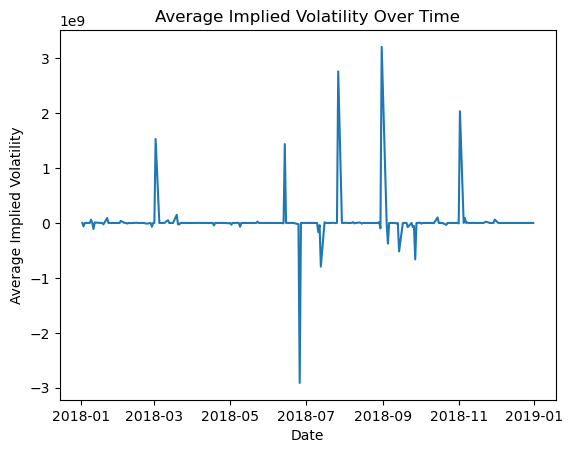

In [10]:
functions.plot(average_iv_apple)

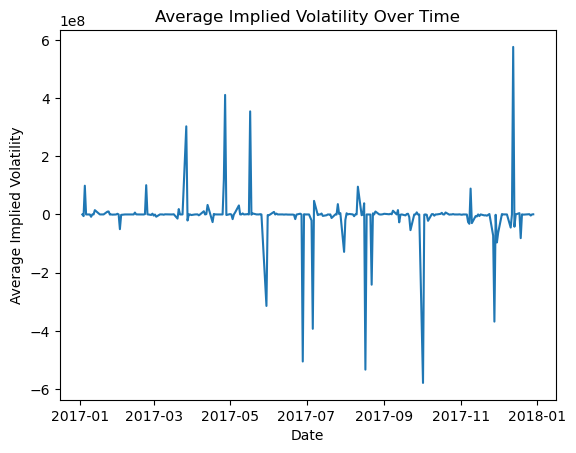

In [11]:
functions.plot(average_iv_microsoft)

In [12]:
import matplotlib.pyplot as plt

def plot(daily_average_iv_dict):
    """
    Plot the average implied volatility for multiple stocks on the same graph.

    Parameters:
    daily_average_iv_dict (dict): A dictionary where keys are stock names and values are DataFrames
                                  with 'date' and 'average_iv' columns.
    """
    plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

    for stock_name, data in daily_average_iv_dict.items():
        # Ensure the date column is in the correct datetime format
        data['date'] = pd.to_datetime(data['date'])
        # Plot each stock's data with a unique label
        plt.plot(data['date'], data['average_iv'], label=stock_name)

    plt.xlabel('Date')
    plt.ylabel('Average Implied Volatility')
    plt.title('Average Implied Volatility Over Time')
    plt.legend()  # Add a legend to identify the lines
    plt.grid(True)  # Optionally add a grid for easier reading
    plt.show()

# Example usage:
# Assuming you have dataframes df_aapl, df_msft, df_googl for Apple, Microsoft, and Google,
# and these dataframes have 'date' and 'average_iv' columns:
# stocks_data = {
#     'AAPL': df_aapl,
#     'MSFT': df_msft,
#     'GOOGL': df_googl
# }
# plot(stocks_data)


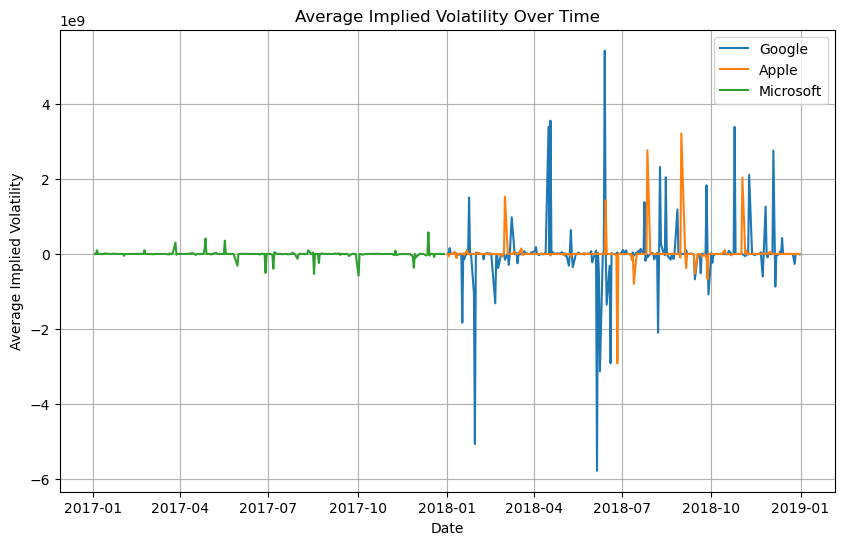

In [13]:
stocks_data = {
    'Google': average_iv_google,
    'Apple': average_iv_apple,
    'Microsoft': average_iv_microsoft
}

# Call the plot function
plot(stocks_data)